<a href="https://colab.research.google.com/github/varun1414/TweetOP/blob/master/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *

In [3]:
df=pd.read_csv('./sample_data/train.csv',encoding='latin-1')

df.dropna(inplace=True)
df['labels']=df['predictions']
# df['labels']=df[df['Category']=='manufacturing']=1
df['labels'][df['labels']=='positive']=1
df['labels'][df['labels']=='negative']=-1
df['labels'][df['labels']=='neutral']=0
df

,textID,text,tweet,predictions,labels
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,-1
2,088c60f138,my boss is bullying me...,bullying me,negative,-1
3,9642c003ef,what interview! leave me alone,leave me alone,negative,-1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,-1
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,-1
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,-1
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,1
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,1


In [141]:
df_tr=df[0:25500]
df_v=df[25500:]

In [136]:
data_lm = TextLMDataBunch.from_df('./',train_df=df_tr,valid_df=df_v,text_cols='text')

In [138]:
data_lm.show_batch()

idx,text
0,"some xxunk plugging for the best xxmaj rangers forum on earth xxbos 2 am xxunk for the baby are fun when he is all smiles and xxunk xxbos s xxrep 4 o high xxbos xxmaj both of you xxbos xxmaj journey ! ? xxmaj wow ... u just became cooler . hehe ... ( is that possible ! ? ) xxbos as much as i love to be hopeful ,"
1,"gone to his house ? xxmaj hehe i mean ur xxunk lucky to have the address ! xxbos i sure do hope it becomes xxunk this afternoon ... xxbos it means that you are now xxup famous . xxmaj congrats ! xxbos xxmaj my phone passed away yesterday .. xxmaj he jumped off the table xxmaj searching for a new phone ... xxbos i have such fantastic friends , including"
2,"but it costs loads to call from england ! ! ! xxbos xxmaj stupid me , accidentally gave my honey the xxmaj xxunk xxunk buffalo wings and now his stomach feels just awful xxrep 5 . i m sorry baby xxbos very relaxing thank you . xxmaj hope you get to put your feet up tomorrow and enjoy the day xxbos yessir that is 100 % right xxbos xxmaj night"
3,"xxmaj determined / wannabe sexy successful young professionals ! ? ? ! i might really have to join a xxup xxunk if there is no1 ! xxbos i should post some photos of my xxunk ok - offline for 4 hours now . ttfn ( oh , so xxup im ... ) xxbos lmao yeaa xxunk n u shuld put tha xxunk flick up w. xxrep 4 * on ur"
4,"! xxmaj hope you get it xxbos xxmaj bored out of my mind ! xxup lol xxbos just finishing studying for xxunk and watching xxup vh1 xxmaj soul xxbos xxmaj sl xxrep 4 e p. xxmaj good day , nice night , comfy bed . xxbos saw your pics , so awesome ! xxbos xxmaj make sure ur xxunk next to the water in the xxunk xxbos _ xxmaj guy"


In [142]:
data = TextClasDataBunch.from_df('./', train_df=df_tr,valid_df=df_v,text_cols='text',label_cols='labels')
data.show_batch()

text,target
"xxbos i xxup tried xxup to xxup put a xxup iron xxup on , xxup on xxup my xxup book xxup bag xxup and i xxup burnt xxup my xxup bag xxup with xxup the xxup iron xxup lol .. xxup buzz xxup keep xxup making xxup fun xxup of xxup me ... ( xxrep 4 * ) xxup lol",1
xxbos a xxrep 4 h xxrep 6 ! xxmaj almost off ! ! ! xxmaj can`t wait ! ! xxmaj but .. i got work again rite after this ! xxup hat xxup club xxmaj come & & gimme some xxmaj company ! xxmaj oh & & a xxmaj cookie ! ;-),0
xxbos xxup omg i xxup finished xxup my xxup history xxup childrens xxup book xxrep 4 ! xxup just xxup need 2 xxup make xxup it xxup pretty xxup and xxup print xxup it xxup off xxup and xxup im xxup done ! ! ! xxup whoo ! ! !,0
xxbos xxmaj bored ... um ... xxmaj song of the day : ' i caught myself by xxmaj paramore ' and ' xxmaj no good deed from the musical xxmaj wicked ' xxmaj oh ! xxmaj and xxmaj fully xxmaj alive by xxmaj xxunk ! ! !,-1
"xxbos ` xxmaj what s your stand on xxrep 4 * marriage ? ` - me . ` what the xxrep 4 * natalie , stop asking me these xxrep 4 * xxrep 4 * questions ! xxmaj go get a job ! ` - dad .",-1


In [143]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.']

In [46]:
# df=df.replace(np.nan,0)
data_lm = (TextList.from_df(df,'./',cols='text')
           #Inputs: all the text files in path
           
        
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=50))

In [47]:
data_lm.show_batch()

idx,text
0,some xxunk plugging for the best xxmaj xxunk forum on earth xxbos 2 am xxunk for the baby are fun when he is all smiles and xxunk xxbos xxmaj both of you xxbos xxmaj journey ! ? xxmaj wow ... u just became cooler . hehe ... ( is that possible ! ? ) xxbos i really really like the song xxmaj love xxmaj story by xxmaj taylor xxmaj swift
1,"xxmaj and i feel like a failure ... xxbos ops that lol was nt supposed to got to twitter xxbos i don`t think xxmaj i`ve ever been so tierd in my life . xxmaj ugh , goodnight . xxmaj so sleeping in tomorrow xxbos xxmaj what are u going to do today my girl ? xxbos why does nt he want me anymore xxbos bad hair day xxbos xxrep 5"
2,thts all . xxbos i had mint ice - cream for dessert tonight . xxmaj love the stuff ! xxbos watching snl with my xxunk girls and laughing about twitter / blackberry jokes thought i`d tweet that . xxbos xxmaj drink # 2 : xxmaj and at xxunk when leaving the shops i had a xxmaj medium xxmaj light xxmaj coffee xxmaj xxunk . xxmaj nom nom nom xxbos xxmaj
3,"xxunk but i missed it xxbos going to xxup xxunk xxunk ... will meet xxunk there instead of xxmaj xxunk http : / / plurk.com / p / xxunk xxbos xxmaj i`m pretty sure xxmaj xxunk has a xxunk . xxmaj so she`s allowed to snuggle with me all she wants tonight . xxbos xxmaj much to my surprise , i was using my credit card before the crack dawn"
4,"xxmaj instead , i got a xxmaj xxunk ! xxbos i wanna go but my car not here ... xxbos i find this tune to be very sexy . xxmaj smooth ... have a lovely day ? http : / / blip.fm / xxunk xxbos xxmaj thank a xxunk how are you ? # xxunk xxbos xxmaj band work . i need my own laptop ! buy me one xxmaj"


In [73]:
data_lm.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.']

In [82]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.1)

In [83]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


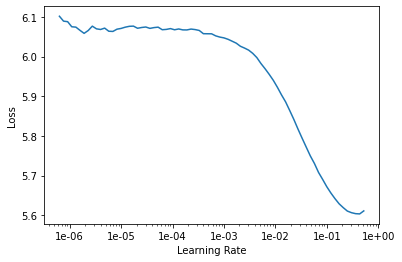

In [84]:
learn.recorder.plot(skip_end=15)

In [85]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.552993,4.320720,0.222648,00:44


In [53]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.389389,4.275690,0.225924,00:44
1,4.249542,4.209747,0.230686,00:44
2,4.068450,4.194113,0.233029,00:44


In [76]:
TEXT = "my boss"
N_WORDS = 40
N_SENTENCES = 2

In [77]:
print("\n".join(learn.predict(TEXT, N_WORDS,temperature=0.75) for _ in range(N_SENTENCES)))

TypeError: ignored

In [56]:
learn.save_encoder('fine_tuned_enc')

In [67]:
data_clas = (TextList.from_df(df,'.', vocab=data_lm.vocab,cols='text')
             #grab all the text files in path
             .split_by_rand_pct(0.2)
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_df(cols='labels')
             #label them all with their folders
             .databunch(bs=50))

In [68]:
data_clas.show_batch()

text,target
"xxbos xxmaj legend of xxmaj xxunk xxrep 7 ? xxrep 6 ? . xxrep 6 ? xxrep 7 ? . xxrep 4 ? xxrep 7 ? 31 ? xxrep 5 ? , xxrep 5 ? xxrep 6 ? ? ? ? . xxrep 9 ? xxrep 4 ? xxrep 6 ? xxrep 5 ? xxrep 7 ? xxrep 10 ?",0
xxbos xxmaj need xxmaj to xxmaj go xxmaj shopping xxmaj boring xxmaj day xxmaj xxunk xxrep 4 . xxmaj nothing xxmaj to xxmaj dooo . xxmaj college xxmaj xxunk ... xxmaj how xxrep 4 * ` xxmaj xxunk ` xxmaj wish xxmaj twitter xxmaj was xxmaj xxunk xxmaj for xxmaj me = ] <3,-1
xxbos xxup omg xxmaj great xxmaj day xxmaj today xxmaj went xxmaj to a xxmaj art xxmaj thingy xxmaj and xxmaj xxunk i xxmaj really xxmaj want a xxmaj xxunk xxup hd xxmaj and xxmaj the xxmaj bed xxmaj part xxmaj its xxmaj raining xxmaj come xxmaj out xxmaj mister xxmaj sun,1
xxbos xxup like u xxup said ' xxup give xxup tc a xxup chance ! ' xxup we xxup will xxup miss xxup thomas xxup but xxup have xxup to xxup move xxup on . xxup so xxup watch xxup this ! http : / / bit.ly / r6rfc,0
"xxbos * * xxmaj xxunk xxmaj drops * * * * xxmaj gasp * * xxmaj whatever do u mean ? xxmaj i`m as sweet as pie xxmaj allow me to re - xxunk myself , xxmaj i`m xxmaj coach & xxmaj i`m a xxmaj cancer & u ?",1


In [69]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.6)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (21984 items)
x: TextList
xxbos xxmaj i`d have xxunk , if i were going,xxbos my boss is xxunk me ...,xxbos xxmaj sons of xxrep 4 * , why couldn`t they put them on the xxunk we already bought,xxbos http : / / xxunk / xxunk - some xxunk plugging for the best xxmaj xxunk forum on earth,xxbos 2 am xxunk for the baby are fun when he is all smiles and xxunk
y: CategoryList
0,-1,-1,-1,1
Path: .;

Valid: LabelList (5496 items)
x: TextList
xxbos rain , rain , rain . wow i actually xxup love the rain xxrep 4 .,xxbos ... rather than xxunk & xxunk at worst , and xxunk , xxunk , xxunk , xxunk & self - xxunk at best .,xxbos it makes me happy to hear a girl talk , or tweet , about the nba . but ... could you give my nuggets some love ? !,xxbos dang ya`ll mothers day already . goodnight twitter world . i start shooting monday .,xxbos i can`t feel the weekend fever anymore when everyday is a day off
y: CategoryList
1,-1,1,0,-1
Path: .;

Test: None, m

In [70]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


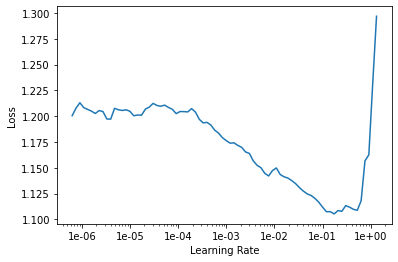

In [71]:
learn.recorder.plot()

In [72]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.947694,0.812824,0.642285,00:25


In [63]:
learn.fit_one_cycle(5, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.914035,0.834370,0.608806,00:26
1,0.905025,0.802835,0.637009,00:25
2,0.909293,0.799896,0.639010,00:25
3,0.883533,0.782801,0.655568,00:24
4,0.891198,0.774991,0.655386,00:27


In [64]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.843308,0.739299,0.669760,00:31


In [66]:
learn.predict('happy')

(Category tensor(2), tensor(2), tensor([5.6614e-04, 9.4825e-03, 9.8995e-01]))